In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

prefix="7C"

In [29]:
df = pd.read_csv('../../dataset/dataframes/all_patchs_dataframe.csv')
df=df.sort_values(by=['Patient'])
df['Patient'].unique()

array([  2,   3,   4,   5,   6,   7,   9,  13,  14,  16,  17,  22,  23,
        32,  40,  44,  58,  72, 114, 133, 169, 192, 226, 230, 231, 247,
       398])

In [30]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

In [31]:
df['label']=df['classe'].apply(lambda x : all_classes[x]) 
df['label'] = df['label'].apply(lambda x: idx_to_label[x])
df

,Patient,lame,patch,classe,label
1111,2,B,2_B_row_49_col_11.jpg,Acinaire,5
10064,2,B,2_B_row_21_col_27.jpg,Normal,0
1078,2,B,2_B_row_40_col_59.jpg,Acinaire,5
1088,2,B,2_B_row_50_col_25.jpg,Acinaire,5
21020,2,B,2_B_row_7_col_15.jpg,Tissu lymphoïde,3
...,...,...,...,...,...
15357,398,R,R_398_A (1493).jpg,Réactionnel,0
15391,398,R,R_398_A (806).jpg,Réactionnel,0
15312,398,R,R_398_A (857).jpg,Réactionnel,0
15400,398,R,R_398_A (312).jpg,Réactionnel,0


In [32]:
for p in df['Patient'].unique():
    print(p,'\n',dict(df.loc[df['Patient']==p]['label'].value_counts()))

2 
 {5: 593, 4: 208, 1: 90, 0: 53, 6: 22, 3: 20}
3 
 {0: 571, 5: 36, 4: 4, 3: 1}
4 
 {3: 67, 5: 51, 0: 18, 1: 8, 6: 1}
5 
 {5: 53, 6: 31, 0: 15, 3: 4, 1: 3}
6 
 {6: 82, 5: 64, 0: 53, 1: 3}
7 
 {0: 3953, 4: 391, 5: 381, 6: 223, 3: 94, 1: 6}
9 
 {2: 1266, 4: 942, 0: 199, 6: 115, 1: 6}
13 
 {5: 463, 0: 12, 3: 3, 6: 2, 4: 1}
14 
 {5: 299, 1: 12, 0: 5, 3: 3}
16 
 {2: 86, 6: 33, 1: 2, 5: 1}
17 
 {2: 39, 5: 12, 1: 10, 3: 3, 0: 1}
22 
 {6: 58, 0: 2}
23 
 {5: 115, 0: 27, 1: 15, 3: 4, 2: 1}
32 
 {3: 89, 1: 54, 5: 51}
40 
 {6: 189, 1: 14, 0: 5, 5: 3, 3: 2}
44 
 {5: 242, 1: 136, 0: 103}
58 
 {1: 22, 3: 18, 6: 16, 0: 13, 5: 2}
72 
 {5: 730, 6: 554, 0: 133, 4: 126, 3: 46, 1: 4}
114 
 {5: 99}
133 
 {5: 626, 1: 25}
169 
 {0: 531, 5: 436, 4: 24, 6: 24, 1: 22}
192 
 {5: 137, 1: 47, 3: 13, 0: 6}
226 
 {5: 212, 1: 77, 3: 58}
230 
 {6: 334, 5: 28, 1: 16, 2: 8, 3: 3}
231 
 {6: 1817, 4: 577, 0: 270, 2: 138, 3: 43, 1: 16}
247 
 {5: 300, 0: 156, 6: 68, 4: 4}
398 
 {0: 1639, 1: 97, 4: 34, 5: 20, 6: 14}


In [33]:
patients_test={2 : 'test', 4 : 'test',5 : 'test',14 : 'test', 17 : 'test',44 : 'train', 133: "test", 247 : 'test', 398 : 'test'}
patients_train={3 : 'train',
                6 : 'train',
                7 : 'train',
                9 : 'train',
                13 :  'train',
                16 : 'train',
                22 : 'train',
                23 : 'train',
                32 : "train" ,
                40 : 'train',
                58 : 'train',
                72 : 'train',
                114 : 'train',
                169 : 'train',
                192 : 'train',
                226 : "train",
                230 :'train',
                231 :'train',
                }

patients_to_dataset = {**patients_train, **patients_test}

print(len(patients_to_dataset), len(patients_train), len(patients_test))
df['dataset']=df['Patient'].apply(lambda x : patients_to_dataset[int(x)])

27 18 9


In [34]:

df['TetraClass']=df['label'].apply(lambda x: label_to_idx[x])
df=df.sort_values(by='label')
df

,Patient,lame,patch,classe,label,dataset,TetraClass
14767,7,R,R_7_A (3178).jpg,Réactionnel,0,train,P
14784,7,R,R_7_A (1906).jpg,Réactionnel,0,train,P
14783,7,R,R_7_A (3746).jpg,Réactionnel,0,train,P
14782,7,R,R_7_A (2140).jpg,Réactionnel,0,train,P
14781,7,R,R_7_A (3318).jpg,Réactionnel,0,train,P
...,...,...,...,...,...,...,...
7473,16,MP,MP_16_B(31).jpg,Micropapillaire,6,train,TuGr3
7370,16,MP,MP_16_B(10).jpg,Micropapillaire,6,train,TuGr3
7358,16,MP,MP_16_B(7).jpg,Micropapillaire,6,train,TuGr3
7667,16,MP,MP_16_B(18).jpg,Micropapillaire,6,train,TuGr3


In [35]:
train_path = f"../../dataset/dataframes/df_train_{prefix}.csv"
test_path = f"../../dataset/dataframes/df_test_{prefix}.csv"

dtrain= df.loc[df['dataset']=='train']
dtest = df.loc[df['dataset']=='test']

dtrain.to_csv(train_path, index=False)
dtest.to_csv(test_path, index=False)
print('train')
print(dtrain['label'].value_counts())

print("\ntest")
print(dtest['label'].value_counts())

train
label
0    5878
6    3447
5    3000
4    2065
2    1499
1     440
3     374
Name: count, dtype: int64

test
label
5    1954
0    1887
4     246
1     245
6     136
3      97
2      39
Name: count, dtype: int64


In [40]:
if prefix=="7C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode=tuple([0.05]*len(colors))

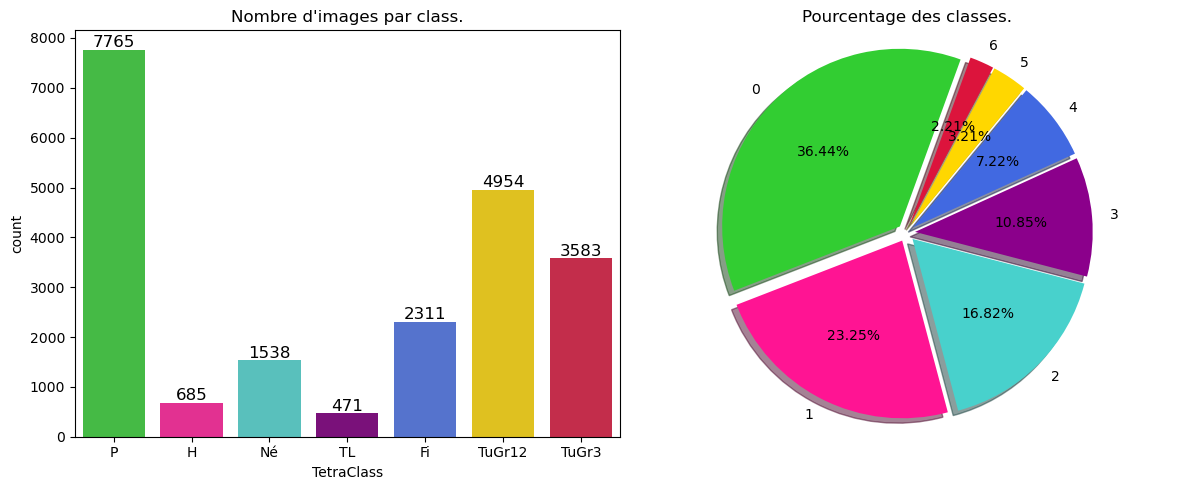

In [41]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df, x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Nombre d'images par class.")
plt.subplot(122)
sizes = [df["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, colors=colors, labels=list(idx_to_label.values()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Pourcentage des classes.')
plt.tight_layout()
plt.savefig(f'Statistiques des images_{prefix}.jpeg')
plt.show()

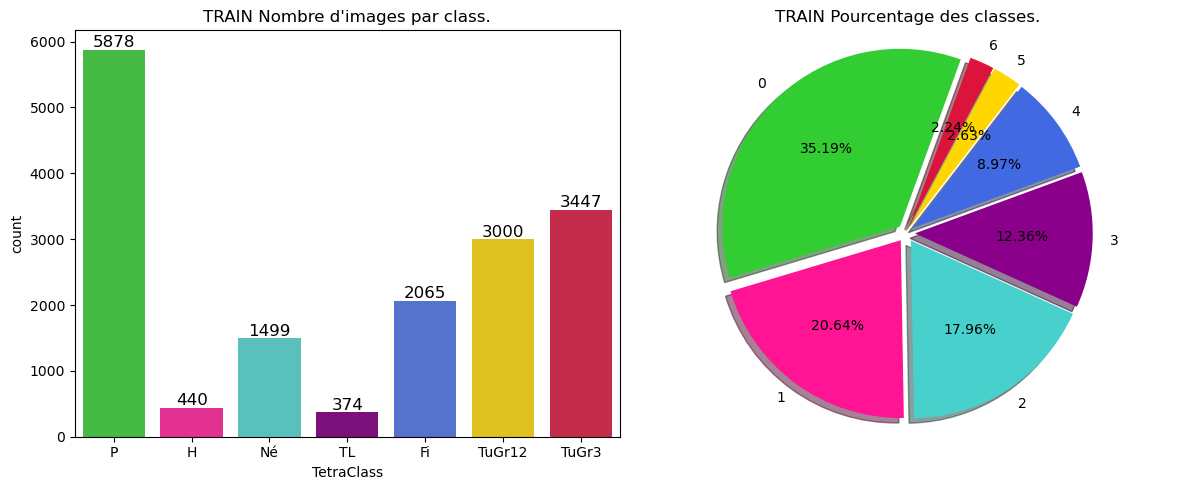

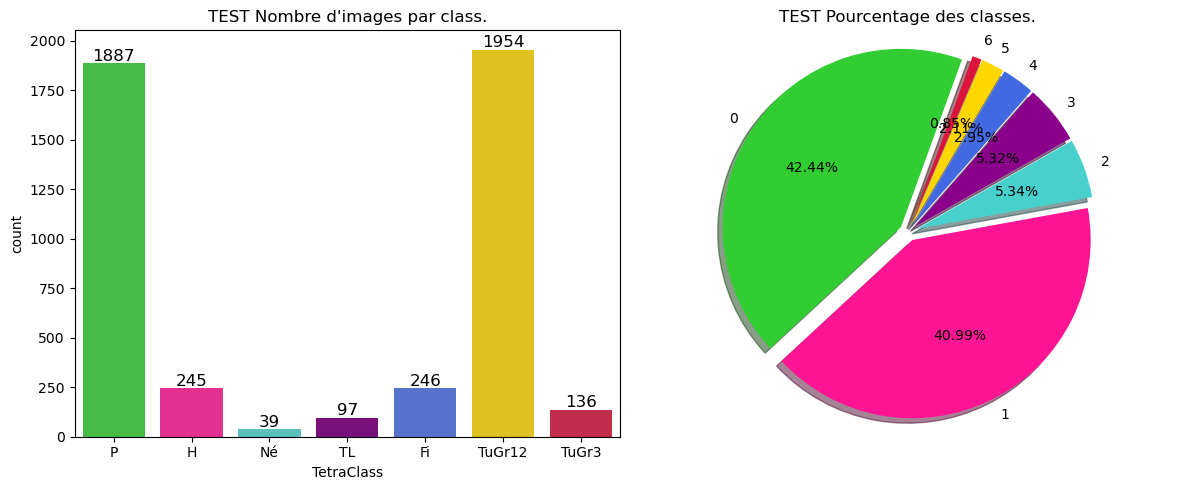

In [42]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='train'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TRAIN Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='train']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TRAIN Pourcentage des classes.')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='test'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TEST Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='test']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TEST Pourcentage des classes.')
plt.tight_layout()
plt.show()